# Форматы данных (1)

Материалы:
* Макрушин С.В. "Лекция 4: Форматы данных"
* https://docs.python.org/3/library/json.html
* https://docs.python.org/3/library/pickle.html
* https://www.crummy.com/software/BeautifulSoup/bs4/doc.ru/bs4ru.html
* Уэс Маккини. Python и анализ данных

## Задачи для совместного разбора

1. Вывести все адреса электронной почты, содержащиеся в адресной книге `addres-book.json`

2. Вывести телефоны, содержащиеся в адресной книге `addres-book.json`

3. По данным из файла `addres-book-q.xml` сформировать список словарей с телефонами каждого из людей. 

## Лабораторная работа №4

Полезные функции для работы с файловой системой:

os.getcwd() - получение текущего пути

os.chdir() - изменение текущего пути

os.mkdir() - создание новой директории

os.rename() - переименование директории

os.rmdir() - удаление директории

os.walk() - получение содержимого директории

In [1]:
import os
import os.path
from os import listdir
from os.path import isfile, join
cwd2 = os.getcwd()
onlyfiles = [f for f in listdir(cwd2) if isfile(join(cwd2, f))]
print(cwd2)
onlyfiles

#cwd=os.getcwd()


# рекурсивный обход дочерних директорий и файлов в них:
#for root, dirs, files in os.walk(cwd):
#    print(f"{root}, dirs: {dirs}, files: {files}")



C:\Users\den10\Desktop\Технологии обработки данных\Лабораторные работы\Laboratory-Work\Лабораторные работы\3


['03_data_files_Галкин Денис Сергеевич.ipynb',
 'job_people.json',
 'job_people.pickle',
 'recipes_sample_with_filled_nsteps.csv',
 'steps_sample.json',
 'steps_sample2.json']

### JSON

1.1 Считайте файл `contributors_sample.json`. Воспользовавшись модулем `json`, преобразуйте содержимое файла в соответствующие объекты python. Выведите на экран информацию о первых 3 пользователях.

In [4]:
import json
cwd=os.getcwd()

with open(cwd+'\\data\\contributors_sample.json', 'r', encoding='UTF-8') as fp:
        # Чтение файла 'data.json' и преобразование
        # данных JSON в объект Python
        data = json.load(fp)
print(type(data[0]))
def PrintFirstData(source, n):
    for i in range(n):    
        print(f"\n{i+1} пользователь:")
        for a in source[i]:
            print(a, source[i][a], sep=" : ")
        i+=1
PrintFirstData(data, 3)
#print("Второй пользователь:\n",data[1])
#print("Третий пользователь:\n",data[2])


<class 'dict'>

1 пользователь:
username : uhebert
name : Lindsey Nguyen
sex : F
address : 01261 Cameron Spring
Taylorfurt, AK 97791
mail : jsalazar@gmail.com
jobs : ['Energy engineer', 'Engineer, site', 'Environmental health practitioner', 'Biomedical scientist', 'Jewellery designer']
id : 35193

2 пользователь:
username : vickitaylor
name : Cheryl Lewis
sex : F
address : 66992 Welch Brooks
Marshallshire, ID 56004
mail : bhudson@gmail.com
jobs : ['Music therapist', 'Volunteer coordinator', 'Designer, interior/spatial']
id : 91970

3 пользователь:
username : sheilaadams
name : Julia Allen
sex : F
address : Unit 1632 Box 2971
DPO AE 23297
mail : darren44@yahoo.com
jobs : ['Management consultant', 'Engineer, structural', 'Lecturer, higher education', 'Theatre manager', 'Designer, textile']
id : 1848091


1.2 Выведите уникальные почтовые домены, содержащиеся в почтовых адресах людей

In [5]:
domens=[]#инициализируем пустой список доменов
for user in data:
    s=user['mail']#находим значение в словаре по ключу "mail"
    s=s[s.find("@") + 1:]#срезаем строку по "@" для получения почтового домена
    domens.append(s)
unic_domens= list(set(domens))#находим уникальные значения
print(unic_domens)

['yahoo.com', 'gmail.com', 'hotmail.com']


1.3 Напишите функцию, которая по `username` ищет человека и выводит информацию о нем. Если пользователь с заданным `username` отсутствует, возбудите исключение `ValueError`

In [6]:
def Find(key):
    isnotinDict= True
    for user in data:
        if user["username"] == key:
            isnotinDict= False
            for info in user:
                print(info, user[info], sep=" : ")
            print()
    if  isnotinDict:
        raise ValueError('Такого пользователя в словаре нет!')
            
Find('sheilaadams')
Find('vickitaylor')
Find('111')

username : sheilaadams
name : Julia Allen
sex : F
address : Unit 1632 Box 2971
DPO AE 23297
mail : darren44@yahoo.com
jobs : ['Management consultant', 'Engineer, structural', 'Lecturer, higher education', 'Theatre manager', 'Designer, textile']
id : 1848091

username : vickitaylor
name : Cheryl Lewis
sex : F
address : 66992 Welch Brooks
Marshallshire, ID 56004
mail : bhudson@gmail.com
jobs : ['Music therapist', 'Volunteer coordinator', 'Designer, interior/spatial']
id : 91970



ValueError: Такого пользователя в словаре нет!

1.4 Посчитайте, сколько мужчин и женщин присутсвует в этом наборе данных.

In [7]:
count_male, count_female= 0,0
for user in data:
    if user['sex']== "F":
        count_female+=1
    else:
        count_male+=1
print(f"Мужчин: {count_male}\nЖенщин: {count_female}")

Мужчин: 2064
Женщин: 2136


1.5 Создайте `pd.DataFrame` `contributors`, имеющий столбцы `id`, `username` и `sex`.

In [8]:
import pandas as pd
contributors= pd.DataFrame(data).drop(['name', 'address', 'mail','jobs'], axis=1)[["id","username","sex"]]
contributors


,id,username,sex
0,35193,uhebert,F
1,91970,vickitaylor,F
2,1848091,sheilaadams,F
3,50969,nicole82,F
4,676820,jean67,M
...,...,...,...
4195,423555,stevenspencer,F
4196,35251,rwilliams,M
4197,135887,lmartinez,F
4198,212714,brendahill,M


1.6 Загрузите данные из файла `recipes_sample.csv` (__ЛР2__) в таблицу `recipes`. Объедините `recipes` с таблицей `contributors` с сохранением строк в том случае, если информация о человеке отсутствует в JSON-файле. Для скольких человек информация отсутствует? 

In [9]:
recipes=pd.read_csv('C:\\Users\\den10\\Desktop\\Технологии обработки данных\\Лабораторные работы\\Laboratory-Work\\Лабораторные работы\\2\\data\\recipes_sample.csv', encoding='ISO-8859–1', parse_dates= ['submitted'])
merged_table= pd.merge(contributors, recipes, left_on= "id", right_on = 'contributor_id', how='right')
merged_table[['id_x']]=merged_table[['id_x']].astype(object)
print(merged_table.info())
merged_table=merged_table.sort_values(by="id_y").set_index("id_y")
table_with_empty_user=merged_table[merged_table['username'].isnull()]
count_empty_user=table_with_empty_user.groupby("contributor_id").count().shape[0]
print(f'для {count_empty_user} человек информация отсутствует')
print('Объединенная таблица представленна ниже:')
merged_table

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_x            14941 non-null  object        
 1   username        14941 non-null  object        
 2   sex             14941 non-null  object        
 3   name            30000 non-null  object        
 4   id_y            30000 non-null  int64         
 5   minutes         30000 non-null  int64         
 6   contributor_id  30000 non-null  int64         
 7   submitted       30000 non-null  datetime64[ns]
 8   n_steps         18810 non-null  float64       
 9   description     29377 non-null  object        
 10  n_ingredients   21120 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 2.7+ MB
None
для 4204 человек информация отсутствует
Объединенная таблица представленна ниже:


,id_x,username,sex,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
id_y,,,,,,,,,,
48,1545.0,bushjohn,F,boston cream pie,135,1545,1999-08-24,32.0,NaN,15.0
55,NaN,NaN,NaN,betty crocker s southwestern guacamole dip,125,1538,1999-09-15,NaN,NaN,5.0
66,174711.0,schultzsteven,M,black coffee barbecue sauce,30,174711,1999-09-10,NaN,it's great to know folks like this sauce so mu...,11.0
91,1576.0,ktaylor,M,brown rice and vegetable pilaf,150,1576,1999-09-06,NaN,this is good with almost anything... robb,NaN
94,NaN,NaN,NaN,blueberry buttertarts,40,1556,1999-09-12,8.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
536547,NaN,NaN,NaN,cauliflower ceviche,45,2002234079,2018-07-30,15.0,a healthy ceviche - a perfect appetizer for pa...,8.0
536610,NaN,NaN,NaN,miracle home made puff pastry,35,2002234259,2018-07-31,17.0,puff pastry that you can make in minutes? at h...,NaN
536728,1052873.0,cookmisty,F,gluten free vegemite,2,1052873,2018-08-11,NaN,gluten free vegemite-like stuff.,3.0


### pickle

2.1 На основе файла `contributors_sample.json` создайте словарь следующего вида: 
```
{
    должность: [список username людей, занимавших эту должность]
}
```

In [12]:
import pickle
from collections import defaultdict
dct = defaultdict(list)
for user in data:
    jobs = user["jobs"]
    username = user["username"]
    for job in jobs:
        dct[job].append(username)
result_dictionary= dict(dct)
result_dictionary['Engineer, site']#Проверка: Должность - список логинов

['uhebert',
 'nancy12',
 'andrea03',
 'catherineross',
 'wesley32',
 'natalieross',
 'rossdoris',
 'christophersmith',
 'dbooker',
 'ericarobertson',
 'trantricia',
 'tpugh',
 'jasonvelez',
 'samantha36',
 'brandidaniels',
 'tenglish',
 'reyesbrett',
 'austin18',
 'vjohnson',
 'zmejia',
 'daniel04',
 'cynthia20',
 'morgan15',
 'avaldez',
 'jessica92',
 'laurieholloway',
 'baileyvictoria']

2.2 Сохраните результаты в файл `job_people.pickle` и в файл `job_people.json` с использованием форматов pickle и JSON соответственно. Сравните объемы получившихся файлов. При сохранении в JSON укажите аргумент `indent`.

In [13]:
#cwd=os.getcwd()
#cwd
with open('C:\\Users\\den10\\Desktop\\Технологии обработки данных\\Лабораторные работы\\Laboratory-Work\\Лабораторные работы\\3\\job_people.pickle', 'wb') as job_people_out1:
    pickle.dump(result_dictionary, job_people_out1)

with open('C:\\Users\\den10\\Desktop\\Технологии обработки данных\\Лабораторные работы\\Laboratory-Work\\Лабораторные работы\\3\\job_people.json', 'w') as job_people_out2:
    json.dump(result_dictionary, job_people_out2, indent=2)

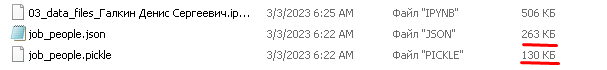

2.3 Считайте файл `job_people.pickle` и продемонстрируйте, что данные считались корректно. 

In [16]:
with open('C:\\Users\\den10\\Desktop\\Технологии обработки данных\\Лабораторные работы\\Laboratory-Work\\Лабораторные работы\\3\\job_people.pickle', 'rb') as f:
    readed_data = pickle.load(f)
print(readed_data['Jewellery designer'])

['uhebert', 'lopezantonio', 'ojames', 'leonnicole', 'daltonmelissa', 'joseph26', 'donnacurry', 'stewartpamela', 'williamsbill', 'garciaduane', 'megan77', 'victoriachavez', 'richardherman', 'elainerodriguez', 'mark85', 'dali', 'bfernandez', 'heatherphillips', 'sdaniel', 'brandigreen', 'zachary61', 'sarahleonard', 'harrisonjeffery']


### XML

3.1 По данным файла `steps_sample.xml` сформируйте словарь с шагами по каждому рецепту вида `{id_рецепта: ["шаг1", "шаг2"]}`. Сохраните этот словарь в файл `steps_sample.json`

In [17]:
from bs4 import BeautifulSoup
path='C:\\Users\\den10\\Desktop\\Технологии обработки данных\\Лабораторные работы\\Laboratory-Work\\Лабораторные работы\\3\\data\\steps_sample.xml'
with open(path, 'r') as f:
     bs_data = BeautifulSoup(f, "xml")
recipes_data = bs_data.find_all('recipe')
steps = dict()
for recipe in recipes_data:
    steps[recipe.id.text]= recipe.steps.getText('|', strip=True).split(sep='|')
with open('C:\\Users\\den10\\Desktop\\Технологии обработки данных\\Лабораторные работы\\Laboratory-Work\\Лабораторные работы\\3\\steps_sample.json', 'w') as r1:
    json.dump(steps, r1, indent=0)
print("Сохранение словаря проведено успешно!")

Сохранение словаря проведено успешно!


3.2 По данным файла `steps_sample.xml` сформируйте словарь следующего вида: `кол-во_шагов_в_рецепте: [список_id_рецептов]`

In [21]:
from collections import defaultdict
id_by_steps = defaultdict(list)
for recipe in recipes_data:
    id_by_steps[len(recipe.steps.getText('|', strip=True).split(sep='|'))].append(recipe.id.text)
#with open('C:\\Users\\den10\\Desktop\\Технологии обработки данных\\Лабораторные работы\\Laboratory-Work\\Лабораторные работы\\3\\steps_sample2.json', 'w') as r2:
#    json.dump(id_by_steps, r2, indent=0)
#print("Сохранение словаря проведено успешно!")


In [23]:
id_by_steps[38]#проверка

['310570',
 '392181',
 '51546',
 '56109',
 '336218',
 '321405',
 '195558',
 '321190',
 '36961',
 '279328',
 '234964',
 '414937',
 '90995']

3.3 Получите список рецептов, в этапах выполнения которых есть информация о времени (часы или минуты). Для отбора подходящих рецептов обратите внимание на атрибуты соответствующих тэгов.

In [29]:
from bs4 import BeautifulSoup as bs
with_hours=bs_data.find_all("step", attrs={'has_hours': 1})
with_minutes=bs_data.find_all("step", attrs={'has_minutes': 1})
ids= list()
for recipe in with_hours:
    ids.append(int(recipe.parent.parent.id.text))
for recipe in with_minutes:
    ids.append(int(recipe.parent.parent.id.text))
ids= (list(set(ids)))
print(f"ПРОВЕРКА:\nВсего рецептов:{len(recipes_data)}")
print(f"В {len(ids)} рецептах есть этапы с информацией о времени.")
print("Первые 100 id рецептов, которые содержат информацию о времени: ")
print(ids[:100])

ПРОВЕРКА:
Всего рецептов:30000
В 23469 рецептах есть этапы с информацией о времени.
Первые 100 id рецептов, которые содержат информацию о времени: 
[524289, 131082, 131087, 131090, 262166, 131096, 131107, 131109, 262188, 48, 55, 262207, 131138, 66, 393286, 262214, 262219, 131149, 91, 94, 131173, 131185, 393340, 131206, 262285, 262293, 153, 393375, 524456, 176, 181, 262325, 262327, 186, 262330, 393409, 262340, 203, 262348, 131275, 524495, 393433, 131295, 224, 393448, 131311, 240, 262386, 246, 131322, 262400, 393496, 288, 289, 131364, 131385, 314, 318, 321, 393538, 131408, 337, 393554, 131423, 131429, 360, 373, 378, 379, 381, 262526, 262531, 524675, 131461, 393609, 131471, 262550, 131483, 262564, 393637, 131497, 262577, 262585, 393658, 445, 524744, 262605, 465, 469, 131542, 262625, 262627, 131558, 131567, 524789, 502, 504, 131587, 131602, 393750]


3.4 Загрузите данные из файла `recipes_sample.csv` (__ЛР2__) в таблицу `recipes`. Для строк, которые содержат пропуски в столбце `n_steps`, заполните этот столбец на основе файла  `steps_sample.xml`. Строки, в которых столбец `n_steps` заполнен, оставьте без изменений.

In [30]:
import numpy as np
import pandas as pd
recipes=pd.read_csv('C:/Users/den10/Desktop/Технологии обработки данных/Лабораторные работы/Laboratory-Work/Лабораторные работы/2/data/recipes_sample.csv', encoding='ISO-8859–1', parse_dates= ['submitted'])
steps2 = dict()
for recipe in recipes_data:
    steps2[recipe.id.text]= len(recipe.steps.getText('|', strip=True).split(sep='|'))
a=recipes[recipes['n_steps'].isna()]
a['n_steps'].fillna(0, inplace=True)
a=a.reset_index(drop=True)
for i in range(a.shape[0]):
    a.loc[i, 'n_steps']= steps2[str(a.loc[i, 'id'])]
#a.replace(0, np.nan, inplace=True)
merge_table= pd.merge(recipes,a[['n_steps', 'id']], left_on="id", right_on="id", how='left')
merge_table.loc[merge_table['n_steps_x'].isna(), 'n_steps_x'] = merge_table.loc[:, 'n_steps_y']
merge_table.drop('n_steps_y', axis=1, inplace=True)
merge_table.rename(columns={'n_steps_x': 'n_steps'}, inplace=True)
merge_table



C:\Users\den10\AppData\Local\Temp\ipykernel_32688\680555793.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['n_steps'].fillna(0, inplace=True)


,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,11.0,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,3.0,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,5.0,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,7.0,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,22.0,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,10.0,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,227978,2012-08-29,7.0,this is a delicious soup that i originally fou...,NaN


3.5 Проверьте, содержит ли столбец `n_steps` пропуски. Если нет, то преобразуйте его к целочисленному типу и сохраните результаты в файл `recipes_sample_with_filled_nsteps.csv`

In [34]:
print(merge_table['n_steps'].isna().any(), "- n_steps не содержит пропусков")
if merge_table['n_steps'].isna().any() == False:
   merge_table=merge_table.astype({'n_steps' : 'Int64'})#recipes=recipes.astype({'submitted' : 'datetime64'})
merge_table.info()
merge_table.to_csv(cwd+'\\recipes_sample_with_filled_nsteps.csv')
print("Сохранение словаря проведено успешно!")


False - n_steps не содержит пропусков
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            30000 non-null  object        
 1   id              30000 non-null  int64         
 2   minutes         30000 non-null  int64         
 3   contributor_id  30000 non-null  int64         
 4   submitted       30000 non-null  datetime64[ns]
 5   n_steps         30000 non-null  Int64         
 6   description     29377 non-null  object        
 7   n_ingredients   21120 non-null  float64       
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 3.1+ MB
Сохранение словаря проведено успешно!
